In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import fractionalOctaves

In [2]:
center, low, high, nominal = fractionalOctaves(frac=1, f=(25, 20000))

array([   31.6227766 ,    63.09573445,   125.89254118,   251.18864315,
         501.18723363,  1000.        ,  1995.26231497,  3981.07170553,
        7943.28234724, 15848.93192461])

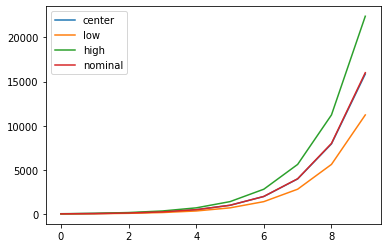

In [3]:
plt.plot(center, label = 'center')
plt.plot(low, label = 'low')
plt.plot(high, label = 'high')
plt.plot(nominal, label = 'nominal')
plt.legend()
center

[   22.39    31.62    44.67    63.1     89.13   125.89   177.83   251.19
   354.81   501.19   707.95  1000.    1412.54  1995.26  2818.38  3981.07
  5623.41  7943.28 11220.18 15848.93 22387.21]


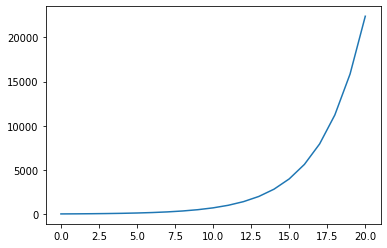

In [59]:
all_freq = np.concatenate((low, center, high))
all_freq = np.unique(np.sort(all_freq.round(decimals=2)))
print(all_freq)
plt.plot(all_freq)

In [5]:
def fractionalOctaveBin(f_high, f):
    #return np.argmax(f_high > f, axis=0)
    return np.searchsorted(f_high, f)

In [6]:
fractionalOctaveBin(high, center)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(array([ 1.,  0.,  0.,  5.,  0.,  0., 11.,  0.,  0., 23.]),
 array([6. , 6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <BarContainer object of 10 artists>)

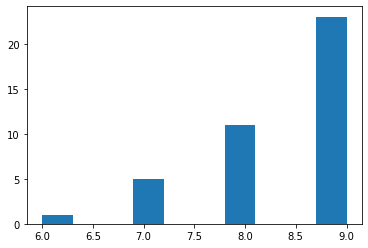

In [7]:
test = np.random.uniform(25, 20000, size=(10, 4))
bins = fractionalOctaveBin(high, test)

plt.hist(bins.flatten())

In [8]:
G = 10**(3/10) # Frequenzverhältnis einer Oktave
f_r = 1000 # Bezugsfrequenz

def Bandmittenfrequenzen(frac, f=(25, 20000)):
    
    rng = np.arange(-250, 130)
    
    if frac % 2:

        f_c = f_r * G ** (rng/frac)

    else:

        f_c = f_r * G ** ((2*rng+1)/(2*frac))

    # restict the range of center frequencies according to f (add a search

    # margin to make sure that nominal frequencies can be querried)

    fMin = G ** (-1/(2*frac)) * min(f)

    fMax = G ** (1/(2*frac)) * max(f)
    
    selection = np.where(np.logical_and(f_c >= fMin, f_c <= fMax))

    f_c = f_c[np.where(np.logical_and(f_c >= fMin, f_c <= fMax))]
    
    return f_c, min(rng[selection]), max(rng[selection])

[   31.6227766     63.09573445   125.89254118   251.18864315
   501.18723363  1000.          1995.26231497  3981.07170553
  7943.28234724 15848.93192461]


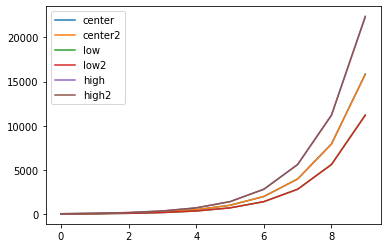

In [9]:
b = 1
center2 = 31.5 * G ** np.arange(0,10)/b
low2 = center2 * (10**(3/10)) ** (-1/(2*b))
high2 = center2 * (10**(3/10)) ** (1/(2*b))

plt.plot(center, label = 'center')
plt.plot(center2, label = 'center2')
plt.plot(low, label = 'low')
plt.plot(low2, label = 'low2')
plt.plot(high, label = 'high')
plt.plot(high2, label = 'high2')
plt.legend()
print(center)

In [10]:
def frequency_bands(b, f_ref, f=(25, 20000)):
    
    if b % 2:

        f_l = f_ref * G ** (np.arange(0, 10 * b)/b)

    else:

        f_l = f_ref * G ** ((2*np.arange(0, 10 * b)+1)/(2*b))
    
    f_c = f_l * (10**(3/10)) ** (1/(2*b))
    f_h = f_c * (10**(3/10)) ** (1/(2*b))

    return f_l, f_c, f_h

In [11]:
l, c, h = frequency_bands(1, 20)
for x, y, z in zip(l,c,h):
    print(f'{x:.2f}\t\t\t{y:.2f}\t\t\t{z:.2f}')

20.00			28.25			39.91
39.91			56.37			79.62
79.62			112.47			158.87
158.87			224.40			316.98
316.98			447.74			632.46
632.46			893.37			1261.91
1261.91			1782.50			2517.85
2517.85			3556.56			5023.77
5023.77			7096.27			10023.74
10023.74			14158.92			20000.00


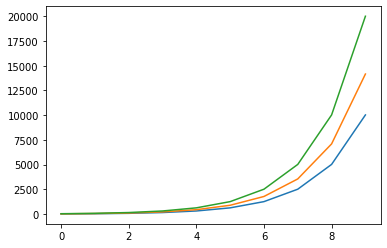

In [12]:
plt.plot(l)
plt.plot(c)
plt.plot(h)

(array([5]),) 10
(array([16]),) 30
(array([27]),) 50
(array([37]),) 68
(array([48]),) 88
(array([59]),) 108
(array([69]),) 126
(array([80]),) 146
(array([91]),) 166
(array([101]),) 184
(array([112]),) 204
(array([123]),) 224


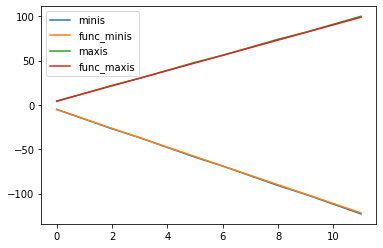

In [13]:
minis = []
maxis = []

x = np.arange(24) + 1
x = x[np.where(x % 2)]

for i in x:
    f, mini, maxi = Bandmittenfrequenzen(i)
    minis.append(mini)
    maxis.append(maxi)
    print(np.where(f == 1000), len(f))

plt.plot(minis, label = 'minis')
plt.plot(x*(-5.3), label = 'func_minis')
plt.plot(maxis, label = 'maxis')
plt.plot(x*4.3, label = 'func_maxis')
plt.legend()

In [14]:
import mitsuba
mitsuba.set_variant("scalar_spectral")
from mitsuba.core import IrregularContinuousDistribution, DiscreteDistribution

In [15]:
SOUND_SPEED = 343

In [16]:
octave_freq = np.array([8, 16, 31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000])
octave_wav = SOUND_SPEED / octave_freq

d = IrregularContinuousDistribution(octave_freq, octave_wav / np.max(octave_wav))